# Analysis and reflection on MyAnimeList anime series

## Introduce the Problem / Goal

### Anime is one of my personal favorite ways to experience a story, and it often provides things that other media forms like TV shows or cartoons just aren't able to, without a blockbuster budget. From high-octane action in another world to a complex analysis of the psyche of Japanese students in their daily life, creativity is used to its fullest in this genre. However, the culture surrounding anime is very chaotic and anything but unified. For example, one of the most popular anime in my dataset, Sword Art Online, ranks 22nd all time in terms of number of people who added it to their favorites list, however is 3175th in MyAnimeList's official rankings. This is all to say that data surrounding anime isn't always the end-all-be-all, and there are many stories you can tell if you just take some time to understand the context. Some things I'm curious about are how closely correlated members and ranking are, as well as total number of favorites. Another thing I plan on looking into is whether or not genre has an impact on ranking or favorites. I also believe that production studio and score will have a correlation, so I plan on checking that out.

## Introduce the Data

### I found this dataset on Kaggle, and it was created to mimic the real life rankings and data using MyAnimeLists's website. The last update I'm aware of was August 2024, 7 months before I'm writing this. This is admittedly a bit of an issue because of possible anime from the seasons up to now missing, as well as possible changes in the quantitative data, not much meaningful change in the data can be made in the time between now and then. 

## Preprocessing

### Fortunately, the dataset I'm using already has a cleaned version available, but one thing I needed to understand was the 'English Name' column and why it had such a large majority of null values (55%!!!). I think this is because of a few factors: mainly that many anime commonly have names that include English words, so there's either minimal need or no need to translate them. Also, one thing I encountered when sifting through was that rankings for anime are separated by season; so seasonal animes (which pause after around 12-20 episodes) regularly have separate rows. However, non-seasonal animes like One Piece only have 1 row, not counting movies. While diving into the genres column, I also noticed that many anime had multiple genres, and because of this, they needed to be split before I was able to use their data regarding popularity. There was also an issue where I would have duplicate genres, and some names would end in a closing bracket, signifying the end of the genre list for that anime. 

In [39]:
%pip install nbconvert
%pip install seaborn
%pip install matplotlib
%pip install pandas



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [45]:
df = pd.read_csv('../../Downloads/top_animes_after_cleaning.csv')
df.columns

Index(['Japanese', 'Type', 'Episodes', 'Status', 'Aired', 'Premiered',
       'Producers', 'Licensors', 'Studios', 'Source', 'Genres', 'Duration',
       'Rating', 'Score', 'Ranked', 'Popularity', 'Members', 'Favorites',
       'description', 'Name', 'English Name', 'Recommended', 'Mixed Feelings',
       'Not Recommended', 'Themes', 'Demographics', 'Seasonal'],
      dtype='object')

In [41]:
df.head(10)

,Japanese,Type,Episodes,Status,Aired,Premiered,Producers,Licensors,Studios,Source,...,Favorites,description,Name,English Name,Recommended,Mixed Feelings,Not Recommended,Themes,Demographics,Seasonal
0,葬送のフリーレン,TV,28,Finished Airing,"Sep 29, 2023 to Mar 22, 2024",Fall 2023,"Aniplex, Dentsu, Shogakukan-Shueis...","None found, add some",Madhouse,Manga,...,43111,During their decade-long quest to defeat the D...,Sousou no Frieren,Frieren: Beyond Journey's End,493,67,42,['Unknown-Themes'],['Shounen'],False
1,鋼の錬金術師 FULLMETAL ALCHEMIST,TV,64,Finished Airing,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,"Aniplex, Square Enix, Mainichi Bro...","Funimation, Aniplex of America",Bones,Manga,...,226182,After a horrific alchemy experiment goes wrong...,Fullmetal Alchemist: Brotherhood,NaN,912,59,39,['Military'],['Shounen'],False
2,STEINS;GATE,TV,24,Finished Airing,"Apr 6, 2011 to Sep 14, 2011",Spring 2011,"Frontier Works, Media Factory, Kad...",Funimation,White Fox,Visual novel,...,189734,Eccentric scientist Rintarou Okabe has a never...,Steins;Gate,NaN,1006,73,73,"['Psychological', 'TimeTravel']",['Unknown-Demographic'],True
3,銀魂°,TV,51,Finished Airing,"Apr 8, 2015 to Mar 30, 2016",Spring 2015,"TV Tokyo, Aniplex, Dentsu","Funimation, Crunchyroll",Bandai Namco Pictures,Manga,...,16680,"Gintoki, Shinpachi, and Kagura return as the f...",Gintama°,Gintama Season 4,79,3,1,"['GagHumor', 'Historical', 'Parody', 'Samurai']",['Shounen'],False
4,進撃の巨人 Season3 Part.2,TV,10,Finished Airing,"Apr 29, 2019 to Jul 1, 2019",Spring 2019,"Production I.G, Dentsu, Mainichi B...",Funimation,Wit Studio,Manga,...,58793,Seeking to restore humanity's diminishing hope...,Shingeki no Kyojin Season 3 Part 2,Attack on Titan Season 3 Part 2,198,9,11,"['Gore', 'Military', 'Survival']",['Shounen'],True
5,銀魂 THE FINAL,Movie,1,Finished Airing,"Jan 8, 2021",NaN,"TV Tokyo, Aniplex, Dentsu, B...",Eleven Arts,Bandai Namco Pictures,Manga,...,4284,Two years have passed following the Tendoshuu'...,Gintama: The Final,Gintama: The Very Final,71,2,5,"['GagHumor', 'Historical', 'Parody', 'Samurai']",['Shounen'],True
6,銀魂',TV,51,Finished Airing,"Apr 4, 2011 to Mar 26, 2012",Spring 2011,"TV Tokyo, Aniplex, Dentsu, T...","None found, add some",Sunrise,Manga,...,8155,"After a one-year hiatus, Shinpachi Shimura ret...",Gintama',Gintama Season 2,39,1,1,"['GagHumor', 'Historical', 'Parody', 'Samurai']",['Shounen'],False
7,HUNTER×HUNTER（ハンター×ハンター）,TV,148,Finished Airing,"Oct 2, 2011 to Sep 24, 2014",Fall 2011,"VAP, Nippon Television Network, Sh...",VIZ Media,Madhouse,Manga,...,210887,Hunters devote themselves to accomplishing haz...,Hunter x Hunter (2011),Hunter x Hunter,783,61,54,['Unknown-Themes'],['Shounen'],False
8,銀河英雄伝説,OVA,110,Finished Airing,"Jan 8, 1988 to Mar 17, 1997",NaN,"TV Tokyo, Kitty Films, Tokuma Shot...",Sentai Filmworks,"K-Factory, Kitty Film Mitaka Studio",Novel,...,16306,The 150-year-long stalemate between the two in...,Ginga Eiyuu Densetsu,Legend of the Galactic Heroes,167,13,10,"['AdultCast', 'Military', 'Space']",['Unknown-Demographic'],False
9,銀魂' 延長戦,TV,13,Finished Airing,"Oct 4, 2012 to Mar 28, 2013",Fall 2012,"TV Tokyo, Aniplex, Dentsu, S...","None found, add some",Sunrise,Manga,...,3054,"While Gintoki Sakata was away, the Yorozuya fo...",Gintama': Enchousen,Gintama: Enchousen,24,0,0,"['GagHumor', 'Historical', 'Parody', 'Samurai']",['Shounen'],True


### The order of animes listed above relates to their score on MyAnimeList!

/var/folders/t4/fc819y_d12x4mw_4wctsmrnc0000gn/T/ipykernel_30320/2923144416.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Recommended', y='Demographics', estimator=sum, ci=None)


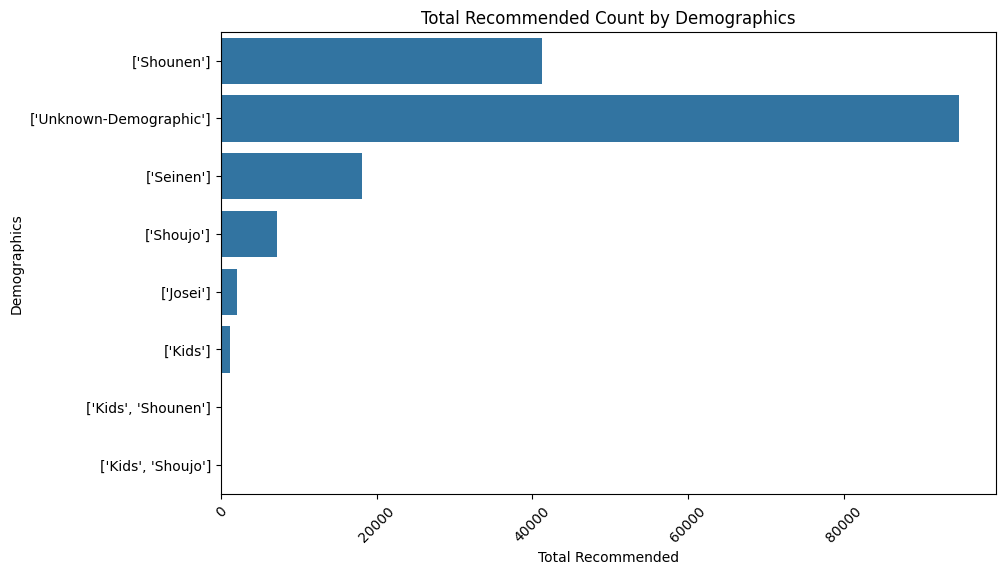

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Load dataset
df = pd.read_csv('../../Downloads/top_animes_after_cleaning.csv')
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Recommended', y='Demographics', estimator=sum, ci=None)

plt.xticks(rotation=45)
plt.title('Total Recommended Count by Demographics')
plt.xlabel('Total Recommended')
plt.ylabel('Demographics')
plt.show()

### I wanted to include this plot to further the point I made in the introduction. I used recommendations in order to gather data about what anime people care enough about to recommend. Not only is the largest portion of recommendations from the unknown demographic, there are multiple different categories of demographics, with Seinen (slower-paced, more realistic) and Shounen (action) each having  roughly 20,000 or more total recommendations, meaning there's something for everyone in anime.

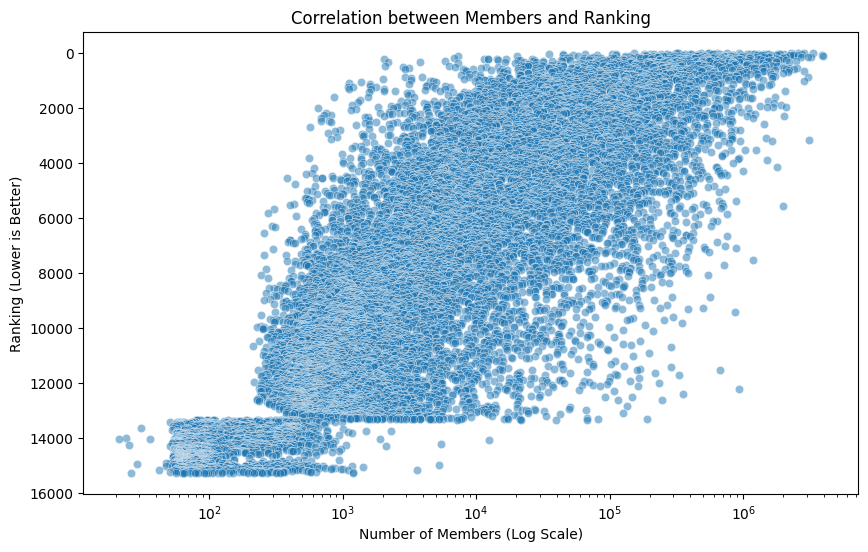

Correlation between Members and Ranking: -0.3692


In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../../Downloads/top_animes_after_cleaning.csv")

# drop missing values
df = df[['Ranked', 'Members']].dropna()  
df= df[df['Ranked'] > 0] 

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Members'], y=df['Ranked'], alpha=0.5)

# customize plot
plt.xscale('log')  # Use log scale for better visualization
plt.gca().invert_yaxis()  # invert ranking (lower is better)
plt.xlabel("Number of Members (Log Scale)")
plt.ylabel("Ranking (Lower is Better)")
plt.title("Correlation between Members and Ranking")

plt.show()

correlation = df['Ranked'].corr(df['Members'])

print(f"Correlation between Members and Ranking: {correlation:.4f}")

### Although this graph is a little polluted, what I wanted to show by including it was how there seems to be a moderately positive correlation between number of members and their ranking (the number is negative because lower is better in ranking). One way to interpret this could be how the higher you go in the rankings, the more likely that the community has more members. Next, I want to look into how the number of favorites relates to ranking.

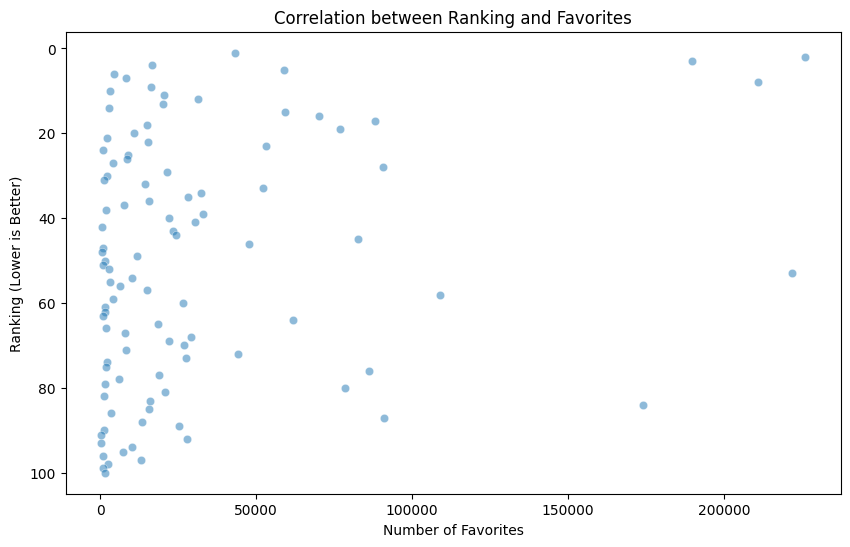

Correlation between Members and Favorites: -0.2341


In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../../Downloads/top_animes_after_cleaning.csv")

# drop missing values
df = df[['Ranked', 'Favorites']].dropna()  
df= df[df['Ranked'] > 0] 
df = df.head(100)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Favorites'], y=df['Ranked'], alpha=0.5)

# customize plot
plt.gca().invert_yaxis()  # invert ranking (lower is better)
plt.xlabel("Number of Favorites")
plt.ylabel("Ranking (Lower is Better)")
plt.title("Correlation between Ranking and Favorites (top 100)")

plt.show()

correlation = df['Ranked'].corr(df['Favorites'])

print(f"Correlation between Members and Favorites: {correlation:.4f}")

 ### I chose to only show the top 100 anime for this visualization because I felt that it would provide a clearer understanding of what's going on. If you consider the idea that lower (worse) ranked anime probably won't have as many favorites, this makes even more sense. Judging from how loosely correlated this graph is and my own conclusions, it seems like there isn't much that you can say about one data type given only the other. I think this is because ranking is a score that takes into account many factors, like production and overall storytelling, as well as user rankings. If you consider the point I made in the introduction about how anime caters for many different types of people and niches, this graph starts to be easily understood. Next up, I'll be looking at the relatinship between popularity and genre.

/var/folders/t4/fc819y_d12x4mw_4wctsmrnc0000gn/T/ipykernel_30320/637970428.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_df['Average Members'], y=genre_df.index, palette="Blues_r")


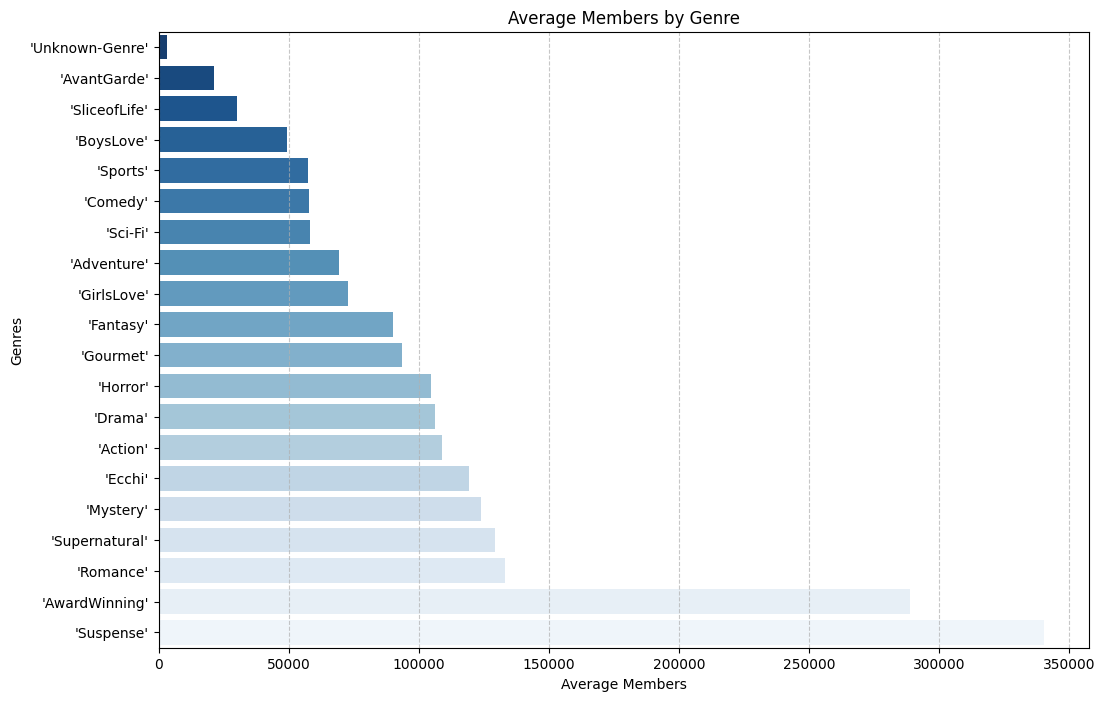

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("../../Downloads/top_animes_after_cleaning.csv")

unique_genres = set()
    
for genres in df['Genres'].dropna():  #drop null values
    for genre in str(genres).split(', '):  #find and split values that have multiple genres
        clean_genre = genre.strip("[] ")  #remove brackets & extra spaces
        unique_genres.add(clean_genre)

df['Genres'] = df['Genres'].apply(lambda x: ', '.join(sorted(str(x).split(', '))))

#store popularity metrics
genre_popularity = {}

for _, row in df.iterrows():
    genres = str(row['Genres']).split(', ')
    members = row['Members']

    for genre in genres:
        clean_genre = genre.strip("[] ")  #clean genre names
        if clean_genre in genre_popularity:
            genre_popularity[clean_genre].append(members)
        else:
            genre_popularity[clean_genre] = [members]

#average members per genre
genre_avg_members = {genre: np.mean(members) for genre, members in genre_popularity.items()}


genre_df = pd.DataFrame.from_dict(genre_avg_members, orient='index', columns=['Average Members'])
genre_df = genre_df.sort_values(by='Average Members', ascending=True)

plt.figure(figsize=(12, 8))
sns.barplot(x=genre_df['Average Members'], y=genre_df.index, palette="Blues_r")

plt.xlabel("Average Members")
plt.ylabel("Genres")
plt.title("Average Members by Genre")
plt.grid(axis='x', linestyle="--", alpha=0.7)

plt.show()

### Here we can see that on average, the 'Suspense' and 'AwardWinning' (what a surprise!) genre have many more members than any other category. The award winning category speaks for itself, but the suspense category caught me off guard. One theory I have for why this genre has almost triple the amount of members as the 3rd place genre is that suspense is a genre that signifies care for the story and plot points. Many anime that are praised for their story progression and author are found in this category, like Monster, Attack On Titan, and Steins;Gate, so it tracks that they would have a massive amount of members. When you get used to anime after watching many, animation and cliches start to lose the effect that they might've had when you first started watching, so anime that truly care for their plot and the creation of their world are held in high regard.

/var/folders/t4/fc819y_d12x4mw_4wctsmrnc0000gn/T/ipykernel_30320/815346390.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Score', y='Studios', data=df_filtered, palette="coolwarm")


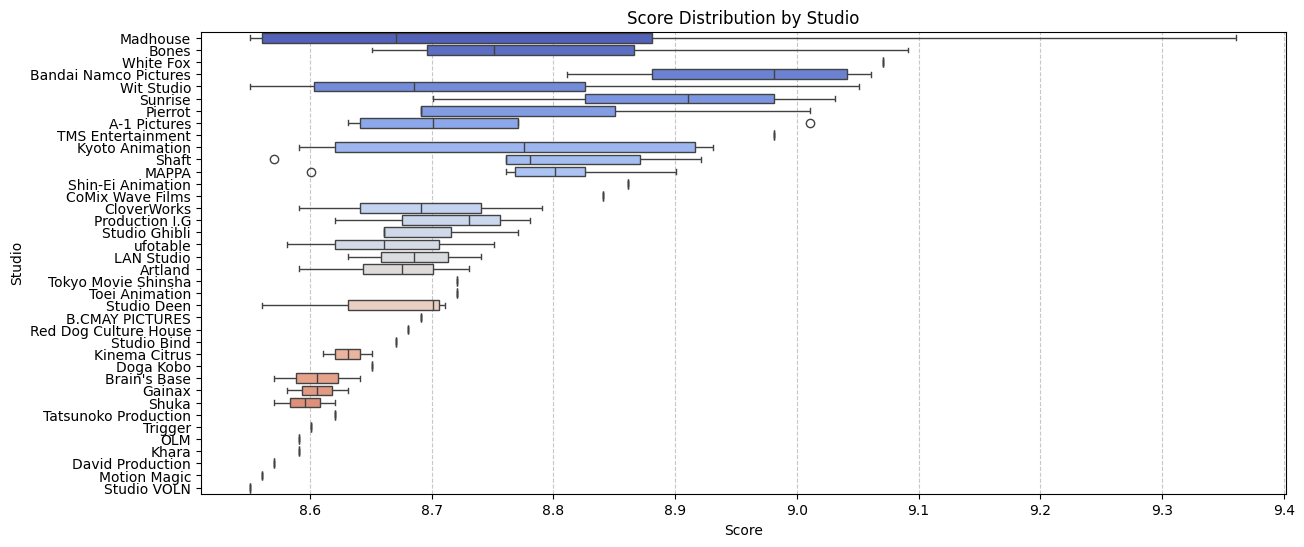

In [89]:
studio_counts = df['Studios'].value_counts()

# Keep only studios with at least 5 anime
popular_studios = studio_counts[studio_counts >= 5].index

# Filter dataset
df_filtered = df[df['Studios'].isin(popular_studios)].head(100)



plt.figure(figsize=(14, 6))
sns.boxplot(x='Score', y='Studios', data=df_filtered, palette="coolwarm")

plt.xlabel("Score")
plt.ylabel("Studio")
plt.title("Score Distribution by Studio")
plt.grid(axis='x', linestyle="--", alpha=0.7)

plt.show()

### Here we see a boxplot of score distribution by studio, and to no surprise, the most notable studios can be found at the top. Bandai Namco seems to have the highest mean, and this is because of their ability to create entire franchises with the rights to certain series. Even non-anime fans will have heard of either Dragon Ball, One Piece, and Naruto, and according to many fans, those are 3 of the best anime of all time. This concentration of cult classics explains its mean at almost 9.0. Mappa seems to be the most consistent in the upper echelon of studios, with its Inter-Quartile Range being smaller than any studios higher than it. This can be attributed to Mappa's devotion to animation quality, even to a fault at times. There has been a movement recently about raising awareness for the treatment of animators working for these studios, and because Mappa consistently takes on the role of adapting popular up-and-coming manga, there is a demanding expectation of quality that can combine with strict deadlines to create a harsh environment for these animators. However, because Mappa seems to be the number 1 option for any popular manga, the stories and overall enjoyment of the anime in production is always very high and well received by fans.

## Impact

### This project was very fun for me and although it took a bit of effort to find trends or patterns in things that I can explain, I can say that this really opened my mind to how colluded the industry can be at times. Popularity and the overall public reception of an anime is far from one-dimensional, and because each fan has varying qualities that they value in the media they consume, it's hard to be number 1 in any specific category. However, I think that's part of the beauty of anime. If you're creating a story, expecting everyone who encounters it to like it is disingenuous, and that's not the way that you cultivate something special. The only thing you can do is follow your heart, hope for and do your best, and hope that the reader or watcher can immerse themselves in the world you've made. I think that lesson can actually be applied to many parts of life, which is a pretty cool takeaway to have.